In [2]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

- - - 

## Procesos Estocásticos (PE)

##### Un proceso estocástico es una colección o familia de variables aleatorias, ordenadas según el subíndice t.

##### Por cada instante de tiempo que tomemos, vamos a tener esa cantidad de variables aleatorias.
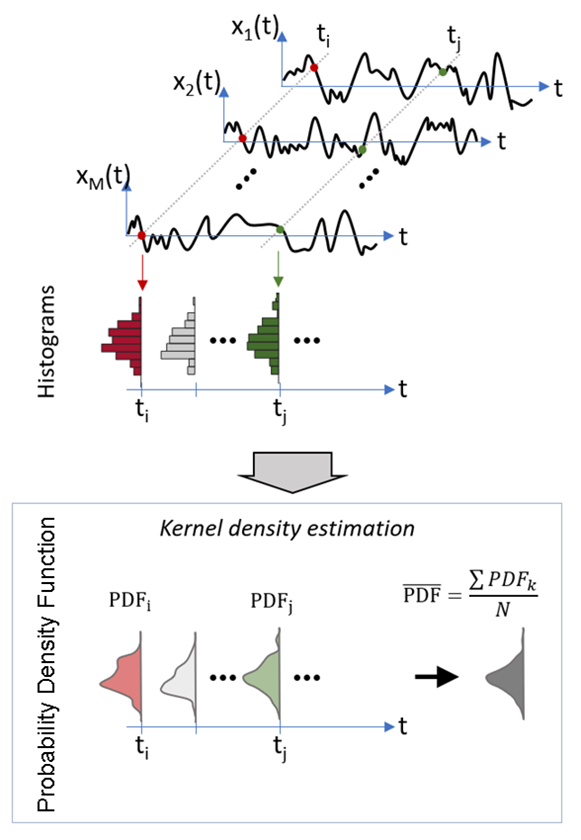

- - -

### En cada instante de tiempo la amplitud de la señal biomédica es una v.a. Cada v.a. tiene asociada una pdf (Función de Densidad de Probabilidad). 

### Supuesto estadístico: cada realización o registro es independiente e igualmente probable.

### Objetivo: Construir un modelo para estas pdf.

- - -

    Procedimiento: 

    Paso (1) Segmentar la señal: dividir la señal en m segmentos de longitud n (muestras). La longitud de la señal nxm.

    Paso (2) Transformar el vector o arreglo de datos en una matriz de n filas x m columnas.

    Paso (3) Las filas de la matriz se corresponden con instantes de tiempo fijos a analizar. En este paso, entonces seleccionamos una o varias filas de la matriz con las que se construirán las pdf.
    Un segmento se corresponde a una columna de la matriz y seleccionamos aleatoriamente un cierto número de filas que corresponden a instantes de tiempo y con estás filas se construyen las pdf.
    
    Paso (4) La construcción de las pdf se hace a través de una función del archivo "Estimaciondeunafdp_new1.ipynb".

- - -

### Resumen de como se construye una pdf a partir de observaciones independientes.

### Llamemos x1, x2, ... , xm a los datos (porque tengo m columnas).

### "kernel" es un pdf. El kernel utilizado es el Gaussiano, que tiene la forma de la señal Gaussiana:

## K (x) = eɅ(-xɅ2/2) / (2.np.pi)Ʌ(1/2)
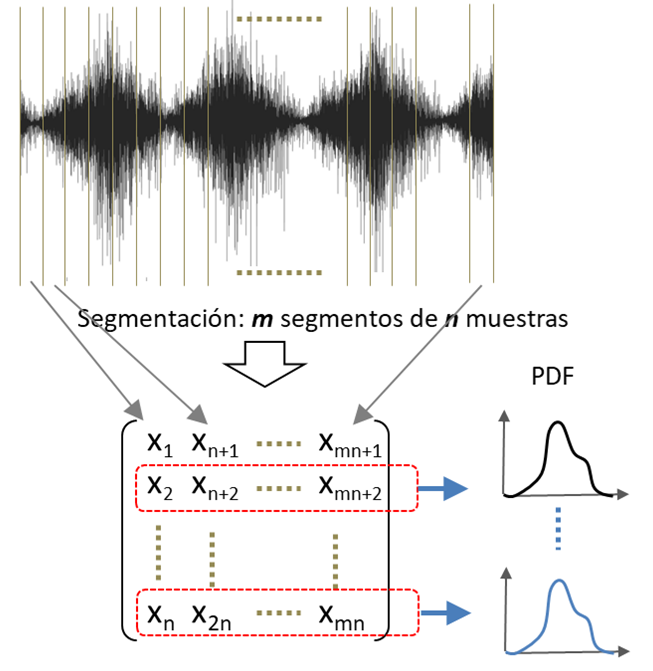

### Con cada dato se asocia un "kernel" y se parametrizan los kernels con el parámetro h (ancho de banda): 
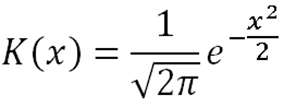

## Kh(x) = (1/h) K ((x-xi)/h) , x ∈ [xi-h , xi+h]

##### Vamos a tener tantos "kernell" como puntos tengamos.
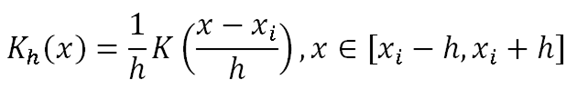

### El estimador de "kernell" se construye sumando los m kernels individuales:

## f (x) = (1/n) ∑ (1/h) K ((x-xi)/h)  (i=1 -> n)
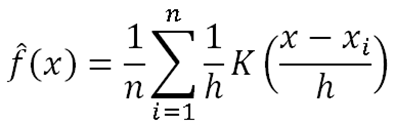

- - -

## Ejemplo: 1.1, 2.1, 2.3, 2.7, 3.8

In [3]:
Fs = 1000
x = np.arange(0,5,1/Fs) #1/Fs para tener muchos datos
xi = np.array([1.1, 2.1, 2.3, 2.7, 3.8])
K1 = np.ndarray((len(x),len(xi)),dtype=float) #KERNEL
h1 = 0.1 #Ancho de banda
for j in np.arange(len(xi)):
    K1[:,j] = (1/np.sqrt(2*np.pi))*np.exp(-0.5*np.power((x-xi[j])/h1,2))/(h1*len(xi))
KG1 = np.sum(K1,axis=1)

In [4]:
KG1.shape

(5000,)

In [5]:
Fs = 1000
x = np.arange(0,5,1/Fs)
xi = np.array([1.1, 2.1, 2.3, 2.7, 3.8])
K2 = np.ndarray((len(x),len(xi)),dtype=float)
h2 = 0.3
for j in np.arange(len(xi)):
    K2[:,j] = (1/np.sqrt(2*np.pi))*np.exp(-0.5*np.power((x-xi[j])/h2,2))/(h2*len(xi))
KG2 = np.sum(K2,axis=1)

In [6]:
KG2.shape

(5000,)

In [7]:
Fs = 1000
x = np.arange(0,5,1/Fs)
xi = np.array([1.1, 2.1, 2.3, 2.7, 3.8])
K3 = np.ndarray((len(x),len(xi)),dtype=float)
h3 = 1
for j in np.arange(len(xi)):
    K3[:,j] = (1/np.sqrt(2*np.pi))*np.exp(-0.5*np.power((x-xi[j])/h3,2))/(h3*len(xi))
KG3 = np.sum(K3,axis=1)

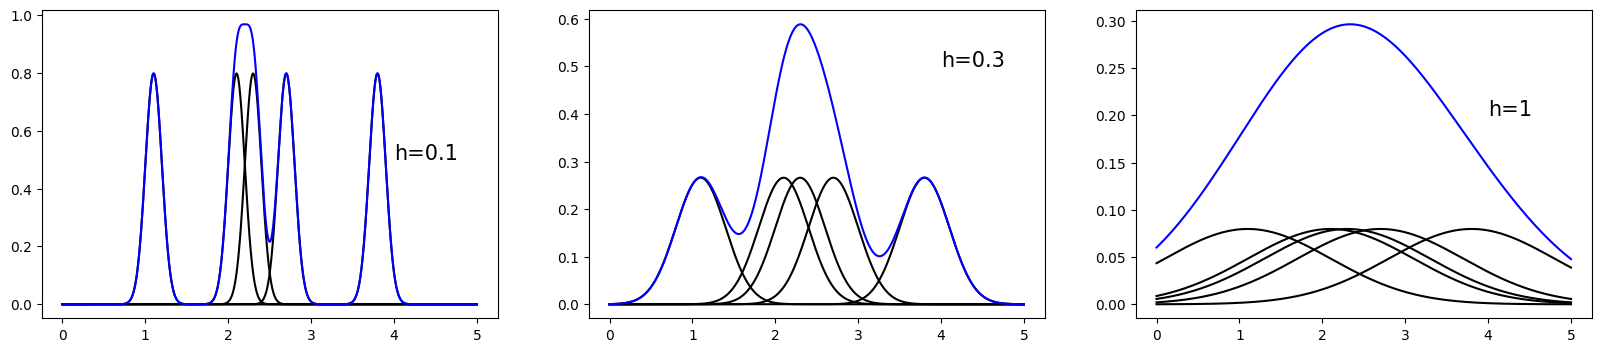

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(x,K1,'k')
plt.plot(x,KG1,'b')
plt.text(4,0.5, s='h=0.1',fontsize=15)
plt.subplot(1,3,2)
plt.plot(x,K2,'k')
plt.plot(x,KG2,'b')
plt.text(4,0.5, s='h=0.3',fontsize=15)
plt.subplot(1,3,3)
plt.plot(x,K3,'k')
plt.plot(x,KG3,'b')
plt.text(4,0.2, s='h=1',fontsize=15)
plt.show()

### Ejemplo de trayectoria de un PE

In [9]:
pres = np.loadtxt('presion.txt')
N = len(pres)
n = np.arange(N)

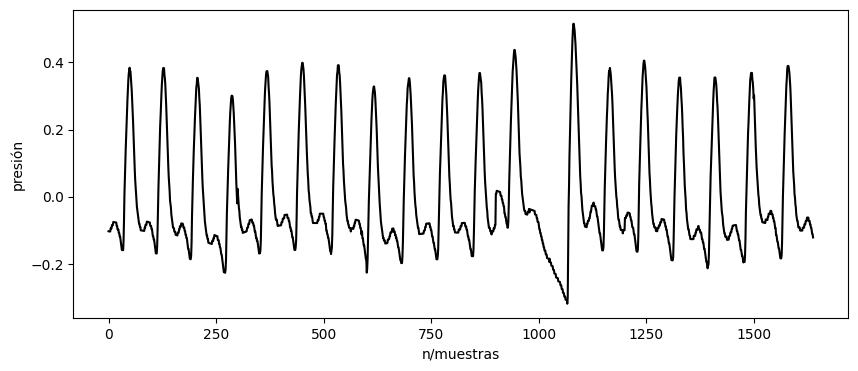

In [10]:
plt.figure(figsize=(10,4))
plt.plot(n,pres,'k')
plt.xlabel('n/muestras')
plt.ylabel('presión')
plt.show()

In [11]:
N/21,78*2,78*3,78*4
#Vamos a tener 21 segmentos con 78 muestras cada uno.

(78.0, 156, 234, 312)

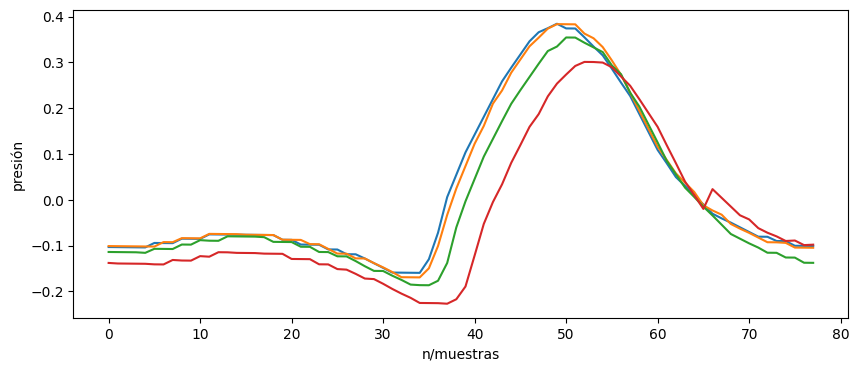

In [12]:
plt.figure(figsize=(10,4))
plt.plot(n[0:78],pres[0:78])
plt.plot(n[0:78],pres[78:156])
plt.plot(n[0:78],pres[156:234])
plt.plot(n[0:78],pres[234:312])
plt.xlabel('n/muestras')
plt.ylabel('presión')
plt.show()

In [13]:
Pres = np.reshape(pres,(78,21),order='F')
Pres.shape

(78, 21)

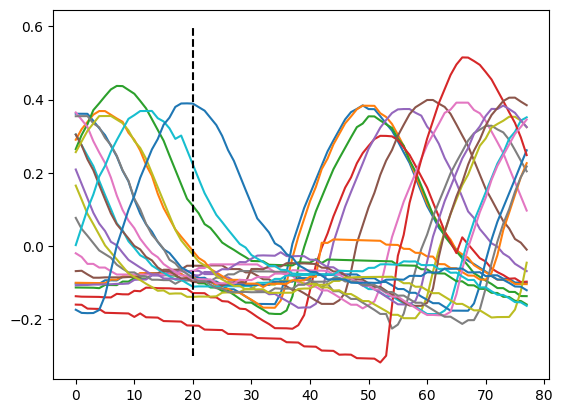

In [14]:
plt.plot(Pres)
plt.vlines(20,-0.3,0.6,'k',linestyle='--')
plt.show()